In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [101]:
print("Shape of the Dataset is : ",df.shape)

Shape of the Dataset is :  (244, 7)


In [102]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
None


In [103]:
print(df.describe().T)

            count       mean       std   min      25%     50%      75%    max
total_bill  244.0  19.785943  8.902412  3.07  13.3475  17.795  24.1275  50.81
tip         244.0   2.998279  1.383638  1.00   2.0000   2.900   3.5625  10.00
size        244.0   2.569672  0.951100  1.00   2.0000   2.000   3.0000   6.00


In [104]:
print(df.isna().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


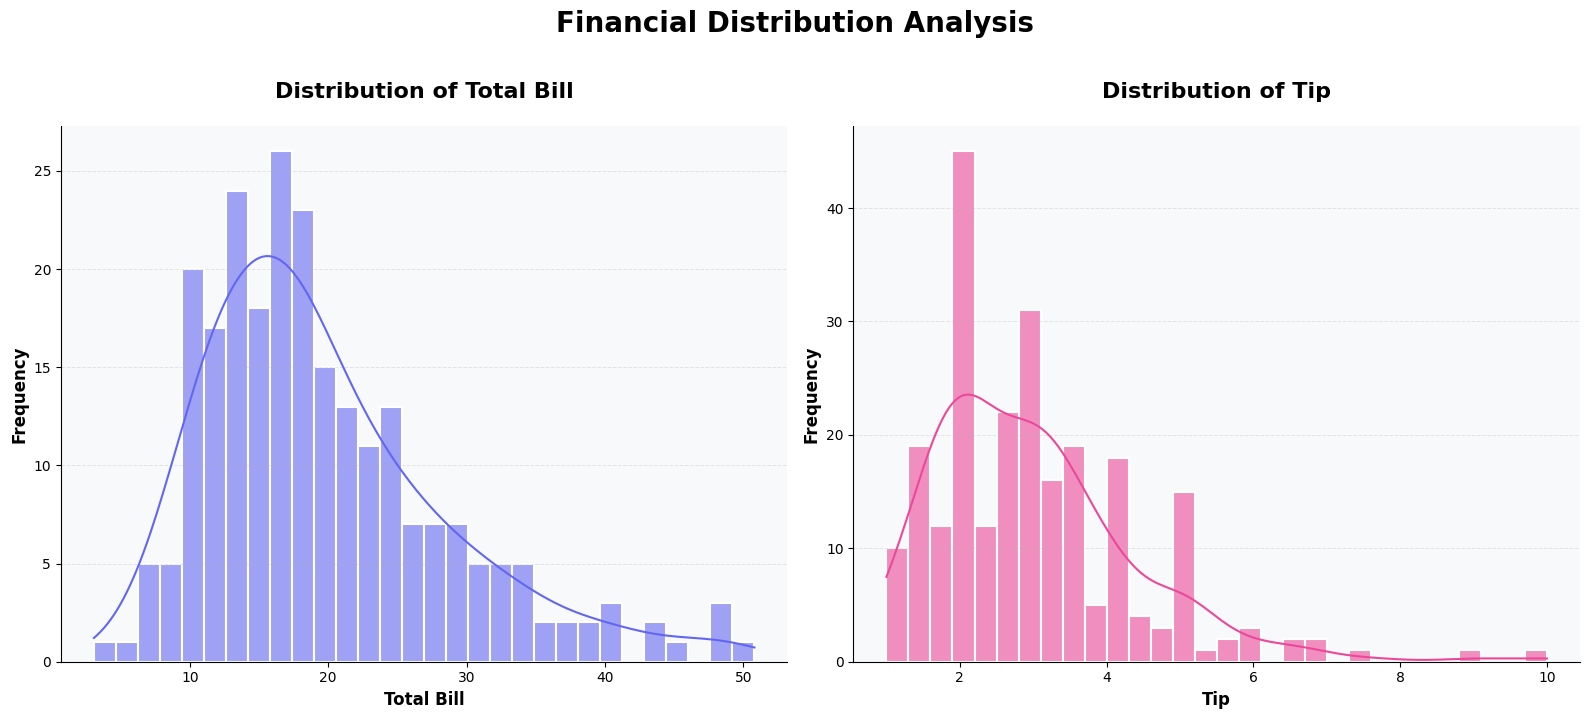

In [105]:
plt.figure(figsize=(16, 7))
columns = ['total_bill', 'tip']
colors = ['#6366f1', '#ec4899']

for i, col in enumerate(columns):
    plt.subplot(1, 2, i+1)
    sns.histplot(df[col], kde=True, color=colors[i],
                 alpha=0.6, edgecolor='white', linewidth=1.5,
                 bins=30)

    plt.title(f"Distribution of {col.replace('_', ' ').title()}",
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel(col.replace('_', ' ').title(), fontsize=12, fontweight='600')
    plt.ylabel('Frequency', fontsize=12, fontweight='600')

    plt.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.7)
    plt.gca().set_facecolor('#f8f9fa')
    sns.despine()

plt.suptitle('Financial Distribution Analysis',
             fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

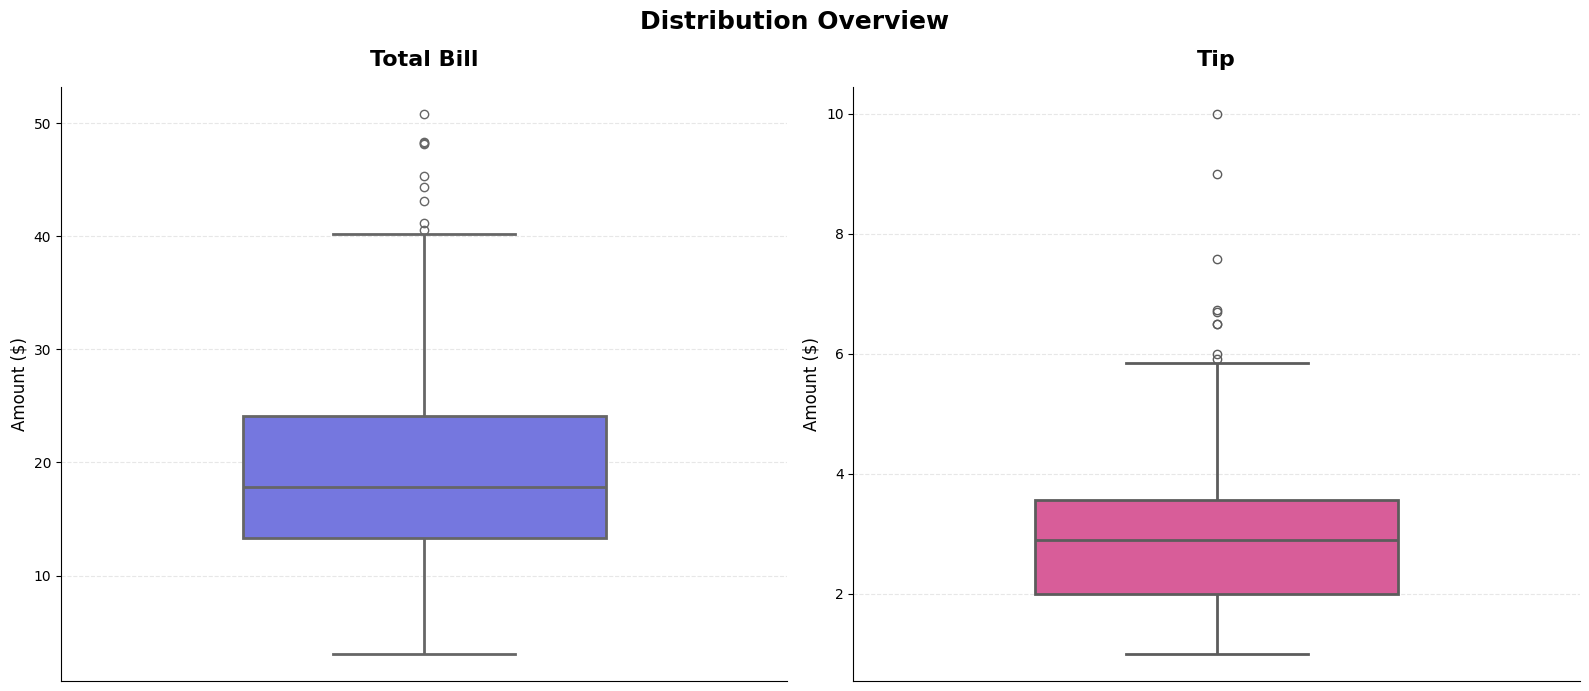

In [106]:
columns = ['total_bill', 'tip']
plt.figure(figsize=(16, 7))
colors = ['#6366f1', '#ec4899']

for i, col in enumerate(columns):
    plt.subplot(1, 2, i+1)
    sns.boxplot(y=df[col], color=colors[i], width=0.5, linewidth=2)
    plt.title(f"{col.replace('_', ' ').title()}",
              fontsize=16, fontweight='bold', pad=15)
    plt.ylabel('Amount ($)', fontsize=12)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    sns.despine()
    plt.xticks([])

plt.suptitle('Distribution Overview', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

In [107]:
print(df.shape)

(244, 7)


In [108]:
print(df[(df['total_bill']<45) & (df['tip']<7)].shape)

(238, 7)


In [109]:
new_df = df.loc[(df['total_bill']<45) & (df['tip']<7)]
new_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [110]:
print(new_df.shape)

(238, 7)


In [111]:
cat_columns = []

for col in new_df.columns:
  if new_df[col].dtype == object:
    cat_columns.append(col)

print(cat_columns)

['sex', 'smoker', 'day', 'time']


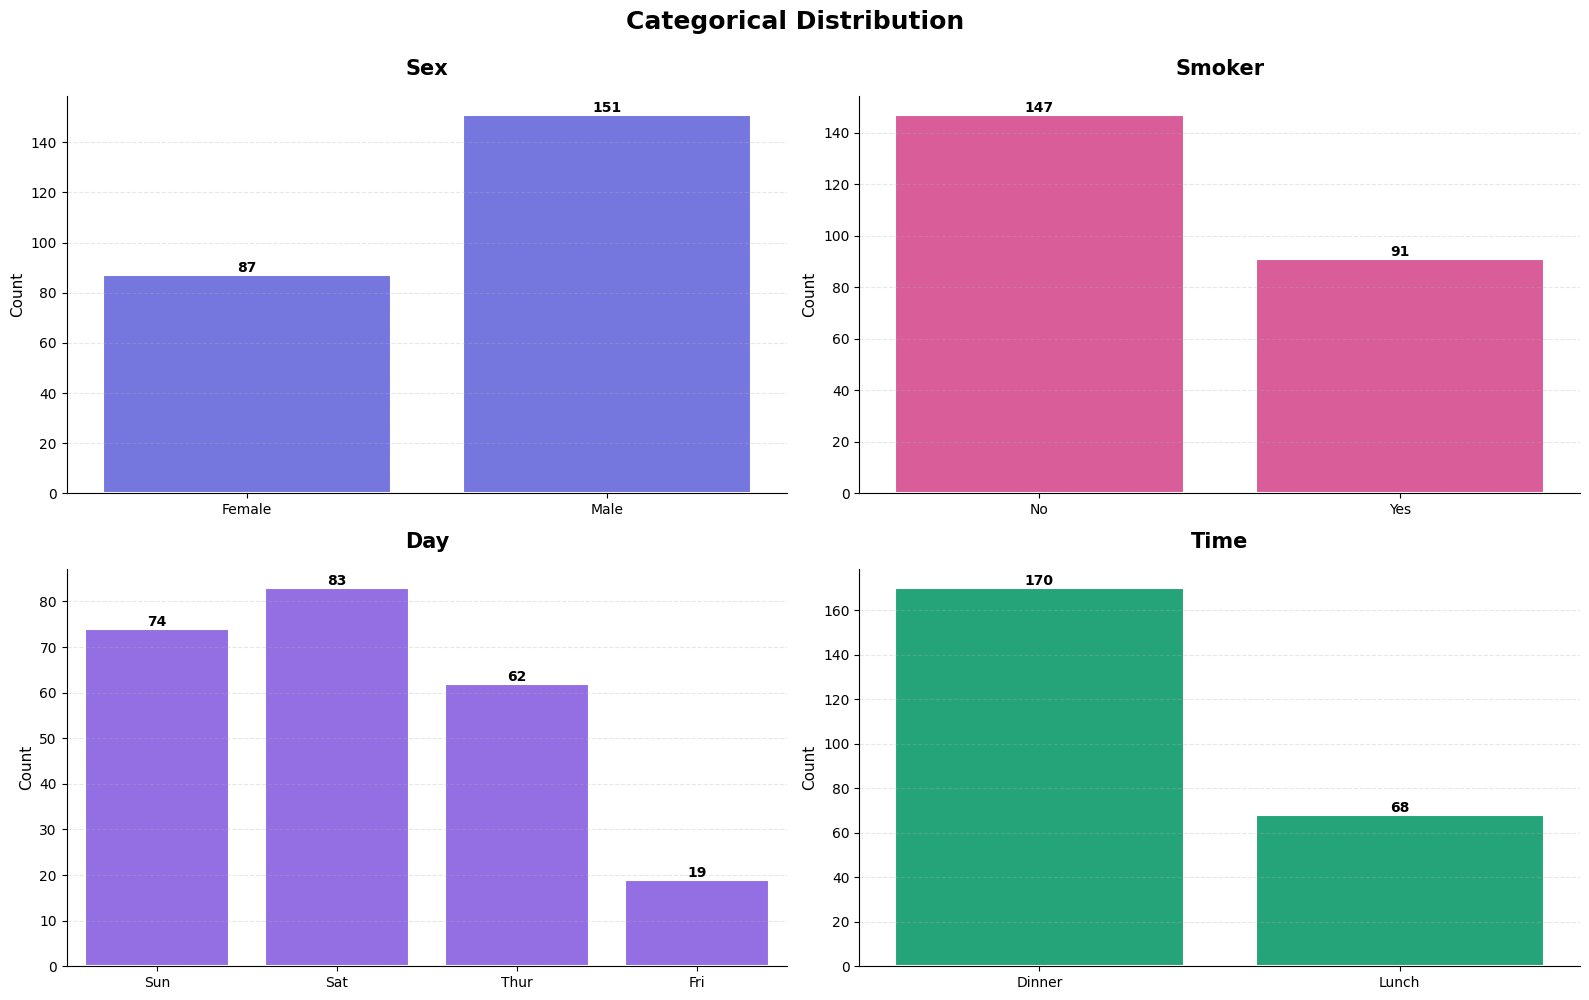

In [112]:
plt.figure(figsize=(16, 10))
colors = ['#6366f1', '#ec4899', '#8b5cf6', '#10b981']

for i, col in enumerate(cat_columns):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=new_df, x=col, color=colors[i],
                  edgecolor='white', linewidth=1.5)

    ax = plt.gca()
    for container in ax.containers:
        ax.bar_label(container, fontsize=10, fontweight='600')

    plt.title(f"{col.replace('_', ' ').title()}",
              fontsize=15, fontweight='bold', pad=15)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=11)
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    sns.despine()

plt.suptitle('Categorical Distribution', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

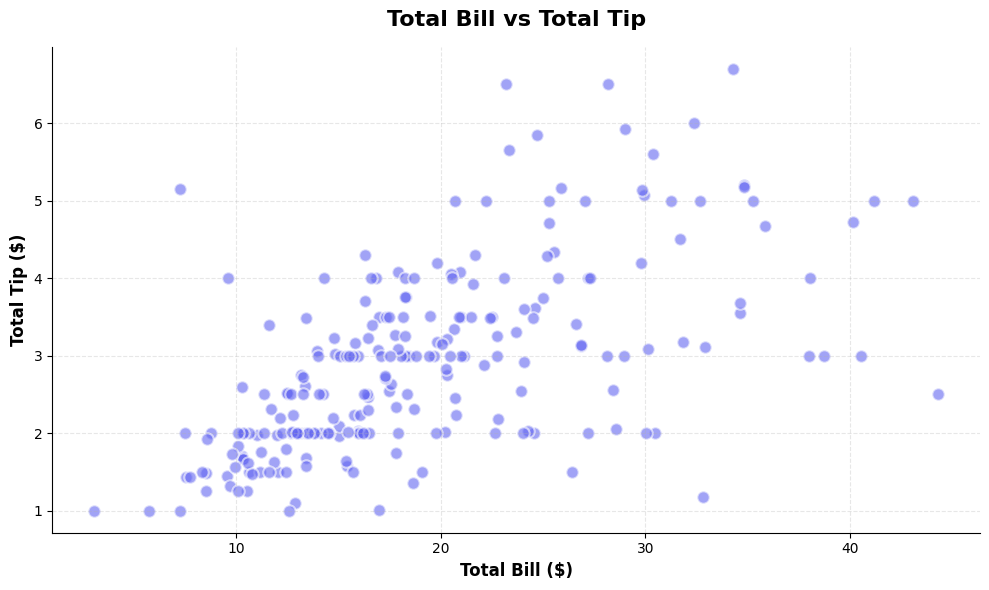

In [113]:
plt.figure(figsize=(10, 6))
plt.scatter(new_df['total_bill'], new_df['tip'],
           color='#6366f1', alpha=0.6, s=80,
           edgecolor='white', linewidth=1.5)

plt.title('Total Bill vs Total Tip', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Total Bill ($)', fontsize=12, fontweight='600')
plt.ylabel('Total Tip ($)', fontsize=12, fontweight='600')
plt.grid(alpha=0.3, linestyle='--')
sns.despine()

plt.tight_layout()
plt.show()

In [114]:
new_df.groupby(['size']).mean(numeric_only=True)

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


In [115]:
new_df.groupby(['time']).mean(numeric_only=True)

,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


In [116]:
new_df.groupby(['day']).mean(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


In [117]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in new_df.columns:
  if new_df[col].dtype == object:
    new_df[col] = le.fit_transform(new_df[col])

new_df.head()

/tmp/ipython-input-2646855538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
/tmp/ipython-input-2646855538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[col] = le.fit_transform(new_df[col])
/tmp/ipython-input-2646855538.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


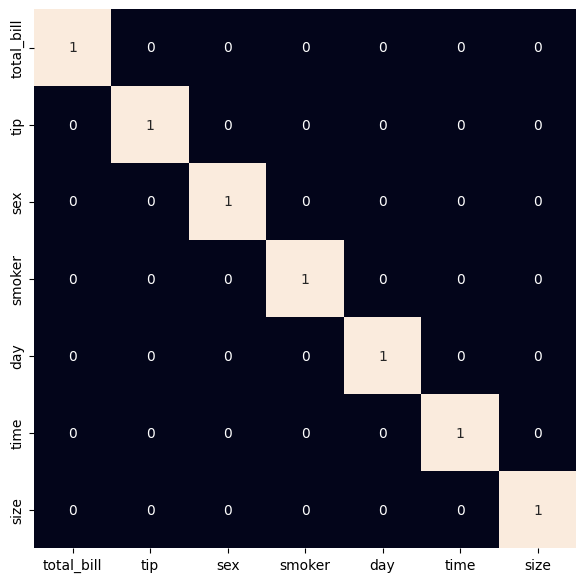

In [121]:
plt.figure(figsize=(7,7))
sns.heatmap(new_df.corr() > 0.7, annot = True, cbar = False)
plt.show()

In [123]:
from sklearn.model_selection import train_test_split

features = new_df.drop('tip', axis=1)
target = new_df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape

((190, 6), (48, 6))

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [127]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(Y_train, pred_train))

  pred_val = models[i].predict(X_val)
  print('Validation Accuracy : ', mae(Y_val, pred_val))
  print()

LinearRegression() : 
Training Accuracy :  0.6866406322422778
Validation Accuracy :  0.7903774704017295

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...) : 
Training Accuracy :  0.02728007923929315
Validation Accuracy :  0.7682166453202566

RandomForestRegressor() : 
Training Accuracy :  0.28277631

RandomForestRegressor had the best generalization performance, indicated by the lowest Validation MAE of 0.7419, despite some overfitting (Training MAE: 0.2827). RandomForestRegressor appears to be the most promising model among those tested for this dataset.